In [6]:
from Bio import SeqIO
import seaborn as sns 
import matplotlib.pyplot as plt

### Lab 8/9
#### 1. We expect short reads to produce more fragmented assembly than long reads because regions of the DNA that are long repeat sequences are inaccessibe to short reads and create ambiguous regions that the stitching algorithm is unable to "piece together". It is nearly impossible to figure out the order of these fragments flanked by repetitive sequences longer than the read itself.  

#### 2. PacBio has a higher error rate than Illumina because it takes the long-read approach. The error rates for long reads occur at a rate of about 15%, meaning about 1/8 or 1/9 bases is read incorrectly. However, new approaches to re-sequencing the entire sequence 10 times to increase accuracy creates more confidence in a correct sequence (because the errors are observed randomly). 

#### Spades Command: 
(navigate to data directory)

spades.py -t 1 -1 illumina_reads_R1.fastq -2 illumina_reads_R2.fastq --pacbio pacbio_reads.fastq -o ../home/5447259/Lab_8/

### Assembly-Stats

Instalation: 

git clone https://github.com/sanger-pathogens/assembly-stats.git

#### Scaffolds Data: 

Input: 

assembly-stats -t /data/Lab9_data/scaffolds.fasta

Output: 

| total_length |number | N50 |
| :---: | :----: | :----: |
|6680345|176|234690|

#### Contigs Data:

Input: 

assembly-stats -t /data/Lab9_data/contigs.fasta

Output: 

| total_length |number | N50 |
| :---: | :----: | :----: |
|6680581|180|234690|




#### 1. N50 is a useful statistic to calculate because it is general measurement of the completeness of an assembly, more specifically the length distribution of all generated contigs. At least half of the contigs/scaffolds in the assembly will have the length of the N50 or greater. The mean or median contig length could be skewed by a couple of very very long contigs and the rest extremely short contigs (say 3 extremely long contigigs and thousands of 5 base pair contigs could have the same average as all mid sized contigs). In this bimodal scenario, one would not be able to calculate approximately how many contigs from the assembly would be needed to represent half the genome. In our assembly, the contigs and scaffolds have approximately the same length.


#### Extra Credit

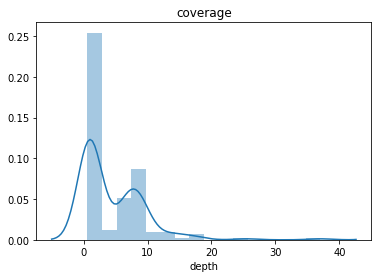

In [12]:
coverage = []
for rec in SeqIO.parse("/data/Lab9_data/contigs.fasta","fasta"):
    record = str(rec.id)
    rec_coverage = float(record.split('_')[-1])
    if rec_coverage < 50:
        coverage.append(rec_coverage)
plt.title('coverage')
plt.xlabel('depth')
sns.distplot(coverage)

### Taxon Identification

#### HMM3.py Command

rna_hmm3.py -i data/Lab9_data/contigs.fasta -o home/5447259/Lab8/contigs.gff -L /data/Lab9_data/HMM3

#### Extracted Ribosomal 16S Lines
NODE_22_length_103366_cov_10.083467	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA
NODE_17_length_154232_cov_9.587340	rna_hmm3	rRNA	124542	126086	0	+	NA	16S_rRNA
NODE_8_length_259210_cov_9.408938	rna_hmm3	rRNA	63713	65257	0	-	NA	16S_rRNA
NODE_5_length_298800_cov_8.930188	rna_hmm3	rRNA	13929	15473	0	+	NA	16S_rRNA
NODE_3_length_378948_cov_10.013238	rna_hmm3	rRNA	348500	350044	0	+	NA	16S_rRNA
NODE_1_length_687571_cov_8.345136	rna_hmm3	rRNA	46286	47830	0	+	NA	16S_rRNA

#### Bedtools Command
bedtools getfasta -fi /data/Lab9_data/contigs.fasta -bed /home/5447259/Lab8/contigs.gff

Output: 
>NODE_8_length_259210_cov_9.408938:60303-63208
GGTGTTATATGGTCAAGCCTCACGGGCAATTAGTATTGGTTAGCTCAACGCCTCACAGCGCTTACACACCCAACCTATCAACGTCGTAGTCTTCGACGGCCCTTCAGGGGACTCAAGGTCCCAGTGAGATCTCATCTTGAGGCTAGTTTCCCGCTTAGATGCTTTCAGCGGTTATCTATTCCGAACATAGCTACCCGGCAATGCCACTGGCGTGACAACCGGAACACCAGAGGTTCGTCCACTCCGGTCCTCTCGTACTAGGAGCAGCCCCTCTCAAATCTCAAACGTCCACGGCAGATAGGGACCGAACTGTCTCACGACGTTCTAAACCCAGCTCGCGTACCACTTTAAATGGCGAACAGCCATACCCTTGGGACCGGCTTCAGCCCCAGGATGTGATGAGCCGACATCGAGGTGCCAAACACCGCCGTCGATATGAACTCTTGGGCGGTATCAGCCTGTTATCCCCGGAGTACCTTTTATCCGTTGAGCGATGGCCCTTCCATACAGAACCACCGGATCACTAAGACCTACTTTCGTACCTGCTCGACGTGTCTGTCTCGCAGTCAAGCGCGCTTTTGCCTTTATACTCTACGACCGATTTCCGACCGGTCTGAGCGCACCTTCGTACTCCTCCGTTACTCTTTAGGAGGAGACCGCCCCAGTCAAACTACCCACCATACACTGTCCTCGATCCGGATAACGGACCTGAGTTAGAACCTCAAAGTTGCCAGGGTGGTATTTCAAGGATGGCTCCACGCGAACTGGCGTCCACGCTTCAAAGCCTCCCACCTATCCTACACAAGCAAATTCAAAGTCCAGTGCAAAGCTATAGTAAAGGTTCACGGGGTCTTTCCGTCTAGCCGCGGATACACTGCATCTTCACAGCGATTTCAATTTCACTGAGTCTCGGGTGGAGACAGCGCCGCCATCGTTACGCCATTCGTGCAGGTCGGAACTTACCCGACAAGGAATTTCGCTACCTTAGGACCGTTATAGTTACGGCCGCCGTTTACCGGGGCTTCGATCAAGAGCTTCGCGTTAGCTAACCCCATCAATTAACCTTCCGGCACCGGGCAGGCGTCACACCCTATACGTCCACTTTCGTGTTTGCAGAGTGCTGTGTTTTTAATAAACAGTCGCAGCGGCCTGGTATCTTCGACCGGCGTGGGCTTACGCAGTAAATGCTTCACCCTCACCGGCGCACCTTCTCCCGAAGTTACGGTGCCATTTTGCCTAGTTCCTTCACCCGAGTTCTCTCAAGCGCCTTGGTATTCTCTACCCAACCACCTGTGTCGGTTTGGGGTACGGTTCCTGGTTACCTGAAGCTTAGAAGCTTTTCTTGGAAGCATGGCATCAACCACTTCGTGTTCTAAAAGAACACTCGTCATCAGCTCTCGGCCTTAGAATCCCGGATTTACCTAAGATTCCAGCCTACCACCTTAAACTTGGACAACCAACGCCAAGCTGGCCTAGCCTTCTCCGTCCCTCCATCGCAATAACCAGAAGTACAGGAATATTAACCTGTTTTCCATCGACTACGCTTTTCAGCCTCGCCTTAGGGACCGACTAACCCTGCGTCGATTAACGTTGCGCAGGAAACCTTGGTCTTTCGGCGTGGGTGTTTTTCACACCCATTGTCGTTACTCATGTCAGCATTCGCACTTCTGATACCTCCAGCAAGCTTCTCAACTCACCTTCACAGGCTTACAGAACGCTCCTCTACCGCATCACCTAAGTGATACCCGTAGCTTCGGTGTATGGTTTGAGCCCCGTTACATCTTCCGCGCAGGCCGACTCGACTAGTGAGCTATTACGCTTTCTTTAAAGGGTGGCTGCTTCTAAGCCAACCTCCTAGCTGTCTAAGCCTTCCCACATCGTTTCCCACTTAACCATAACTTTGGGACCTTAGCTGACGGTCTGGGTTGTTTCCCTTTTCACGACGGACGTTAGCACCCGCCGTGTGTCTCCCATGCTCGGCACTTGTAGGTATTCGGAGTTTGCATCGGTTTGGTAAGTCGGGATGACCCCCTAGCCGAAACAGTGCTCTACCCCCTACAGTGATACATGAGGCGCTACCTAAATAGCTTTCGAGGAGAACCAGCTATCTCCGAGCTTGATTAGCCTTTCACTCCGATCCACAGGTCATCCGCTAACTTTTCAACGGTAGTCGGTTCGGTCCTCCAGTTAGTGTTACCCAACCTTCAACCTGCCCATGGATAGATCGCCCGGTTTCGGGTCTATTCCCAGCGACTAGACGCCCTATTAAGACTCGCTTTCGCTACGCCTCCCCTATTCGGTTAAGCTCGCCACTGAAAATAAGTCGCTGACCCATTATACAAAAGGTACGCAGTCACCCAACAAAGTGGGCTCCCACTGCTTGTACGCATACGGTTTCAGGATCTATTTCACTCCCCTCTCCGGGGTTCTTTTCGCCTTTCCCTCACGGTACTAGTTCACTATCGGTCAGTCAGTAGTATTTAGCCTTGGAGGATGGTCCCCCCATATTCAGACAAAGTTTCTCGTGCTCCGTCCTACTCGATTTCATGGCCAAGAGATTTTCGCGTACAGGGCTATCACCCACTATGGCCGCACTTTCCAGAGCGTTCCGCTAATCTCAAAGCCACTTAAGGGCTAGTCCCCGTTCGCTCGCCACTACTAAGGGAATCTCGGTTGATTTCTTTTCCTCAGGGTACTTAGATGTTTCAGTTCCCCTGGTTCGCTTCTTAAGCCTATGTATTCAGCTTAAGATACCTAACTTATGTTAGGTGGGTTCCCCCATTCAGACATCTCCGGATCAAAGTCTGTTTGCCGACTCCCCGAAGCTTTTCGCAGGCTACCACGTCTTTCATCGCCTCTGACTGCCAAGGCATCCACCGTATGCGCTTCTTCACTTGACCATATA
>NODE_22_length_103366_cov_10.083467:37579-40484
TATATGGTCAAGTGAAGAAGCGCATACGGTGGATGCCTTGGCAGTCAGAGGCGATGAAAGACGTGGTAGCCTGCGAAAAGCTTCGGGGAGTCGGCAAACAGACTTTGATCCGGAGATGTCTGAATGGGGGAACCCACCTAACATAAGTTAGGTATCTTAAGCTGAATACATAGGCTTAAGAAGCGAACCAGGGGAACTGAAACATCTAAGTACCCTGAGGAAAAGAAATCAACCGAGATTCCCTTAGTAGTGGCGAGCGAACGGGGACTAGCCCTTAAGTGGCTTTGAGATTAGCGGAACGCTCTGGAAAGTGCGGCCATAGTGGGTGATAGCCCTGTACGCGAAAATCTCTTGGCCATGAAATCGAGTAGGACGGAGCACGAGAAACTTTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTACTGACTGACCGATAGTGAACTAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGAGAGGGGAGTGAAATAGATCCTGAAACCGTATGCGTACAAGCAGTGGGAGCCCACTTTGTTGGGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATTTTCAGTGGCGAGCTTAACCGAATAGGGGAGGCGTAGCGAAAGCGAGTCTTAATAGGGCGTCTAGTCGCTGGGAATAGACCCGAAACCGGGCGATCTATCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTACCGTTGAAAAGTTAGCGGATGACCTGTGGATCGGAGTGAAAGGCTAATCAAGCTCGGAGATAGCTGGTTCTCCTCGAAAGCTATTTAGGTAGCGCCTCATGTATCACTGTAGGGGGTAGAGCACTGTTTCGGCTAGGGGGTCATCCCGACTTACCAAACCGATGCAAACTCCGAATACCTACAAGTGCCGAGCATGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAAAGGGAAACAACCCAGACCGTCAGCTAAGGTCCCAAAGTTATGGTTAAGTGGGAAACGATGTGGGAAGGCTTAGACAGCTAGGAGGTTGGCTTAGAAGCAGCCACCCTTTAAAGAAAGCGTAATAGCTCACTAGTCGAGTCGGCCTGCGCGGAAGATGTAACGGGGCTCAAACCATACACCGAAGCTACGGGTATCACTTAGGTGATGCGGTAGAGGAGCGTTCTGTAAGCCTGTGAAGGTGAGTTGAGAAGCTTGCTGGAGGTATCAGAAGTGCGAATGCTGACATGAGTAACGACAATGGGTGTGAAAAACACCCACGCCGAAAGACCAAGGTTTCCTGCGCAACGTTAATCGACGCAGGGTTAGTCGGTCCCTAAGGCGAGGCTGAAAAGCGTAGTCGATGGAAAACAGGTTAATATTCCTGTACTTCTGGTTATTGCGATGGAGGGACGGAGAAGGCTAGGCCAGCTTGGCGTTGGTTGTCCAAGTTTAAGGTGGTAGGCTGGAATCTTAGGTAAATCCGGGATTCTAAGGCCGAGAGCTGATGACGAGTGTTCTTTTAGAACACGAAGTGGTTGATGCCATGCTTCCAAGAAAAGCTTCTAAGCTTCAGGTAACCAGGAACCGTACCCCAAACCGACACAGGTGGTTGGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAATGGCACCGTAACTTCGGGAGAAGGTGCGCCGGTGAGGGTGAAGCATTTACTGCGTAAGCCCACGCCGGTCGAAGATACCAGGCCGCTGCGACTGTTTATTAAAAACACAGCACTCTGCAAACACGAAAGTGGACGTATAGGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTTAGCTAACGCGAAGCTCTTGATCGAAGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCGACCTGCACGAATGGCGTAACGATGGCGGCGCTGTCTCCACCCGAGACTCAGTGAAATTGAAATCGCTGTGAAGATGCAGTGTATCCGCGGCTAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTTGCACTGGACTTTGAATTTGCTTGTGTAGGATAGGTGGGAGGCTTTGAAGCGTGGACGCCAGTTCGCGTGGAGCCATCCTTGAAATACCACCCTGGCAACTTTGAGGTTCTAACTCAGGTCCGTTATCCGGATCGAGGACAGTGTATGGTGGGTAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGTACGAAGGTGCGCTCAGACCGGTCGGAAATCGGTCGTAGAGTATAAAGGCAAAAGCGCGCTTGACTGCGAGACAGACACGTCGAGCAGGTACGAAAGTAGGTCTTAGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGAACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGACGTTTGAGATTTGAGAGGGGCTGCTCCTAGTACGAGAGGACCGGAGTGGACGAACCTCTGGTGTTCCGGTTGTCACGCCAGTGGCATTGCCGGGTAGCTATGTTCGGAATAGATAACCGCTGAAAGCATCTAAGCGGGAAACTAGCCTCAAGATGAGATCTCACTGGGACCTTGAGTCCCCTGAAGGGCCGTCGAAGACTACGACGTTGATAGGTTGGGTGTGTAAGCGCTGTGAGGCGTTGAGCTAACCAATACTAATTGCCCGTGAGGCTTGACCATATAACACC
>NODE_3_length_378948_cov_10.013238:350548-353454
TATATGGTCAAGTGAAGAAGCGCATACGGTGGATGCCTTGGCAGTCAGAGGCGATGAAAGACGTGGTAGCCTGCGAAAAGCTTCGGGGAGTCGGCAAACAGACTTTGATCCGGAGATGTCTGAATGGGGGAACCCACCTAACATAAGTTAGGTATCTTAAGCTGAATACATAGGCTTAAGAAGCGAACCAGGGGAACTGAAACATCTAAGTACCCTGAGGAAAAGAAATCAACCGAGATTCCCTTAGTAGTGGCGAGCGAACGGGGACTAGCCCTTAAGTGGCTTTGAGATTAGCGGAACGCTCTGGAAAGTGCGGCCATAGTGGGTGATAGCCCTGTACGCGAAAATCTCTTGGCCATGAAATCGAGTAGGACGGAGCACGAGAAACTTTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTACTGACTGACCGATAGTGAACTAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGAGAGGGGAGTGAAATAGATCCTGAAACCGTATGCGTACAAGCAGTGGGAGCCCACTTTGTTGGGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATTTTCAGTGGCGAGCTTAACCGAATAGGGGAGGCGTAGCGAAAGCGAGTCTTAATAGGGCGTCTAGTCGCTGGGAATAGACCCGAAACCGGGCGATCTATCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTACCGTTGAAAAGTTAGCGGATGACCTGTGGATCGGAGTGAAAGGCTAATCAAGCTCGGAGATAGCTGGTTCTCCTCGAAAGCTATTTAGGTAGCGCCTCATGTATCACTGTAGGGGGTAGAGCACTGTTTCGGCTAGGGGGTCATCCCGACTTACCAAACCGATGCAAACTCCGAATACCTACAAGTGCCGAGCATGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAAAGGGAAACAACCCAGACCGTCAGCTAAGGTCCCAAAGTTATGGTTAAGTGGGAAACGATGTGGGAAGGCTTAGACAGCTAGGAGGTTGGCTTAGAAGCAGCCACCCTTTAAAGAAAGCGTAATAGCTCACTAGTCGAGTCGGCCTGCGCGGAAGATGTAACGGGGCTCAAACCATACACCGAAGCTACGGGTATCACTTAGGTGATGCGGTAGAGGAGCGTTCTGTAAGCCTGTGAAGGTGAGTTGAGAAGCTTGCTGGAGGTATCAGAAGTGCGAATGCTGACATGAGTAACGACAATGGGTGTGAAAAACACCCACGCCGAAAGACCAAGGTTTCCTGCGCAACGTTAATCGACGCAGGGTTAGTCGGTCCCTAAGGCGAGGCTGAAAAGCGTAGTCGATGGAAAACAGGTTAATATTCCTGTACTTCTGGTTATTGCGATGGAGGGACGGAGAAGGCTAGGCCAGCTTGGCGTTGGTTGTCCAAGTTTAAGGTGGTAGGCTGGAATCTTAGGTAAATCCGGGATTCTAAGGCCGAGAGCTGATGACGAGTGTTCTTTTAGAACACGAAGTGGTTGATGCCATGCTTCCAAGAAAAGCTTCTAAGCTTCAGGTAACCAGGAACCGTACCCCAAACCGACACAGGTGGTTGGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAATGGCACCGTAACTTCGGGAGAAGGTGCGCCGGTGAGGGTGAAGCATTTACTGCGTAAGCCCACGCCGGTCGAAGATACCAGGCCGCTGCGACTGTTTATTAAAAACACAGCACTCTGCAAACACGAAAGTGGACGTATAGGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTTAGCTAACGCGAAGCTCTTGATCGAAGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCGACCTGCACGAATGGCGTAACGATGGCGGCGCTGTCTCCACCCGAGACTCAGTGAAATTGAAATCGCTGTGAAGATGCAGTGTATCCGCGGCTAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTTGCACTGGACTTTGAATTTGCTTGTGTAGGATAGGTGGGAGGCTTTGAAGCGTGGACGCCAGTTCGCGTGGAGCCATCCTTGAAATACCACCCTGGCAACTTTGAGGTTCTAACTCAGGTCCGTTATCCGGATCGAGGACAGTGTATGGTGGGTAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGTACGAAGGTGCGCTCAGACCGGTCGGAAATCGGTCGTAGAGTATAAAGGCAAAAGCGCGCTTGACTGCGAGACAGACACGTCGAGCAGGTACGAAAGTAGGTCTTAGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGAACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGACGTTTGAGATTTGAGAGGGGCTGCTCCTAGTACGAGAGGACCGGAGTGGACGAACCTCTGGTGTTCCGGTTGTCACGCCAGTGGCATTGCCGGGTAGCTATGTTCGGAATAGATAACCGCTGAAAGCATCTAAGCGGGAAACTAGCCTCAAGATGAGATCTCACTGGGACCTTGAGTCCCCTGAAGGGCCGTCGAAGACTACGACGTTGATAGGTTGGGTGTGTAAGCGCTGTGAGGCGTTGAGCTAACCAATACTAATTGCCCGTGAGGCTTGACCATATAACACCC
>NODE_17_length_154232_cov_9.587340:126590-129495
TATATGGTCAAGTGAAGAAGCGCATACGGTGGATGCCTTGGCAGTCAGAGGCGATGAAAGACGTGGTAGCCTGCGAAAAGCTTCGGGGAGTCGGCAAACAGACTTTGATCCGGAGATGTCTGAATGGGGGAACCCACCTAACATAAGTTAGGTATCTTAAGCTGAATACATAGGCTTAAGAAGCGAACCAGGGGAACTGAAACATCTAAGTACCCTGAGGAAAAGAAATCAACCGAGATTCCCTTAGTAGTGGCGAGCGAACGGGGACTAGCCCTTAAGTGGCTTTGAGATTAGCGGAACGCTCTGGAAAGTGCGGCCATAGTGGGTGATAGCCCTGTACGCGAAAATCTCTTGGCCATGAAATCGAGTAGGACGGAGCACGAGAAACTTTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTACTGACTGACCGATAGTGAACTAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGAGAGGGGAGTGAAATAGATCCTGAAACCGTATGCGTACAAGCAGTGGGAGCCCACTTTGTTGGGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATTTTCAGTGGCGAGCTTAACCGAATAGGGGAGGCGTAGCGAAAGCGAGTCTTAATAGGGCGTCTAGTCGCTGGGAATAGACCCGAAACCGGGCGATCTATCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTACCGTTGAAAAGTTAGCGGATGACCTGTGGATCGGAGTGAAAGGCTAATCAAGCTCGGAGATAGCTGGTTCTCCTCGAAAGCTATTTAGGTAGCGCCTCATGTATCACTGTAGGGGGTAGAGCACTGTTTCGGCTAGGGGGTCATCCCGACTTACCAAACCGATGCAAACTCCGAATACCTACAAGTGCCGAGCATGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAAAGGGAAACAACCCAGACCGTCAGCTAAGGTCCCAAAGTTATGGTTAAGTGGGAAACGATGTGGGAAGGCTTAGACAGCTAGGAGGTTGGCTTAGAAGCAGCCACCCTTTAAAGAAAGCGTAATAGCTCACTAGTCGAGTCGGCCTGCGCGGAAGATGTAACGGGGCTCAAACCATACACCGAAGCTACGGGTATCACTTAGGTGATGCGGTAGAGGAGCGTTCTGTAAGCCTGTGAAGGTGAGTTGAGAAGCTTGCTGGAGGTATCAGAAGTGCGAATGCTGACATGAGTAACGACAATGGGTGTGAAAAACACCCACGCCGAAAGACCAAGGTTTCCTGCGCAACGTTAATCGACGCAGGGTTAGTCGGTCCCTAAGGCGAGGCTGAAAAGCGTAGTCGATGGAAAACAGGTTAATATTCCTGTACTTCTGGTTATTGCGATGGAGGGACGGAGAAGGCTAGGCCAGCTTGGCGTTGGTTGTCCAAGTTTAAGGTGGTAGGCTGGAATCTTAGGTAAATCCGGGATTCTAAGGCCGAGAGCTGATGACGAGTGTTCTTTTAGAACACGAAGTGGTTGATGCCATGCTTCCAAGAAAAGCTTCTAAGCTTCAGGTAACCAGGAACCGTACCCCAAACCGACACAGGTGGTTGGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAATGGCACCGTAACTTCGGGAGAAGGTGCGCCGGTGAGGGTGAAGCATTTACTGCGTAAGCCCACGCCGGTCGAAGATACCAGGCCGCTGCGACTGTTTATTAAAAACACAGCACTCTGCAAACACGAAAGTGGACGTATAGGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTTAGCTAACGCGAAGCTCTTGATCGAAGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCGACCTGCACGAATGGCGTAACGATGGCGGCGCTGTCTCCACCCGAGACTCAGTGAAATTGAAATCGCTGTGAAGATGCAGTGTATCCGCGGCTAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTTGCACTGGACTTTGAATTTGCTTGTGTAGGATAGGTGGGAGGCTTTGAAGCGTGGACGCCAGTTCGCGTGGAGCCATCCTTGAAATACCACCCTGGCAACTTTGAGGTTCTAACTCAGGTCCGTTATCCGGATCGAGGACAGTGTATGGTGGGTAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGTACGAAGGTGCGCTCAGACCGGTCGGAAATCGGTCGTAGAGTATAAAGGCAAAAGCGCGCTTGACTGCGAGACAGACACGTCGAGCAGGTACGAAAGTAGGTCTTAGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGAACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGACGTTTGAGATTTGAGAGGGGCTGCTCCTAGTACGAGAGGACCGGAGTGGACGAACCTCTGGTGTTCCGGTTGTCACGCCAGTGGCATTGCCGGGTAGCTATGTTCGGAATAGATAACCGCTGAAAGCATCTAAGCGGGAAACTAGCCTCAAGATGAGATCTCACTGGGACCTTGAGTCCCCTGAAGGGCCGTCGAAGACTACGACGTTGATAGGTTGGGTGTGTAAGCGCTGTGAGGCGTTGAGCTAACCAATACTAATTGCCCGTGAGGCTTGACCATATAACACC
>NODE_5_length_298800_cov_8.930188:15977-18882
TATATGGTCAAGTGAAGAAGCGCATACGGTGGATGCCTTGGCAGTCAGAGGCGATGAAAGACGTGGTAGCCTGCGAAAAGCTTCGGGGAGTCGGCAAACAGACTTTGATCCGGAGATGTCTGAATGGGGGAACCCACCTAACATAAGTTAGGTATCTTAAGCTGAATACATAGGCTTAAGAAGCGAACCAGGGGAACTGAAACATCTAAGTACCCTGAGGAAAAGAAATCAACCGAGATTCCCTTAGTAGTGGCGAGCGAACGGGGACTAGCCCTTAAGTGGCTTTGAGATTAGCGGAACGCTCTGGAAAGTGCGGCCATAGTGGGTGATAGCCCTGTACGCGAAAATCTCTTGGCCATGAAATCGAGTAGGACGGAGCACGAGAAACTTTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTACTGACTGACCGATAGTGAACTAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGAGAGGGGAGTGAAATAGATCCTGAAACCGTATGCGTACAAGCAGTGGGAGCCCACTTTGTTGGGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATTTTCAGTGGCGAGCTTAACCGAATAGGGGAGGCGTAGCGAAAGCGAGTCTTAATAGGGCGTCTAGTCGCTGGGAATAGACCCGAAACCGGGCGATCTATCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTACCGTTGAAAAGTTAGCGGATGACCTGTGGATCGGAGTGAAAGGCTAATCAAGCTCGGAGATAGCTGGTTCTCCTCGAAAGCTATTTAGGTAGCGCCTCATGTATCACTGTAGGGGGTAGAGCACTGTTTCGGCTAGGGGGTCATCCCGACTTACCAAACCGATGCAAACTCCGAATACCTACAAGTGCCGAGCATGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAAAGGGAAACAACCCAGACCGTCAGCTAAGGTCCCAAAGTTATGGTTAAGTGGGAAACGATGTGGGAAGGCTTAGACAGCTAGGAGGTTGGCTTAGAAGCAGCCACCCTTTAAAGAAAGCGTAATAGCTCACTAGTCGAGTCGGCCTGCGCGGAAGATGTAACGGGGCTCAAACCATACACCGAAGCTACGGGTATCACTTAGGTGATGCGGTAGAGGAGCGTTCTGTAAGCCTGTGAAGGTGAGTTGAGAAGCTTGCTGGAGGTATCAGAAGTGCGAATGCTGACATGAGTAACGACAATGGGTGTGAAAAACACCCACGCCGAAAGACCAAGGTTTCCTGCGCAACGTTAATCGACGCAGGGTTAGTCGGTCCCTAAGGCGAGGCTGAAAAGCGTAGTCGATGGAAAACAGGTTAATATTCCTGTACTTCTGGTTATTGCGATGGAGGGACGGAGAAGGCTAGGCCAGCTTGGCGTTGGTTGTCCAAGTTTAAGGTGGTAGGCTGGAATCTTAGGTAAATCCGGGATTCTAAGGCCGAGAGCTGATGACGAGTGTTCTTTTAGAACACGAAGTGGTTGATGCCATGCTTCCAAGAAAAGCTTCTAAGCTTCAGGTAACCAGGAACCGTACCCCAAACCGACACAGGTGGTTGGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAATGGCACCGTAACTTCGGGAGAAGGTGCGCCGGTGAGGGTGAAGCATTTACTGCGTAAGCCCACGCCGGTCGAAGATACCAGGCCGCTGCGACTGTTTATTAAAAACACAGCACTCTGCAAACACGAAAGTGGACGTATAGGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTTAGCTAACGCGAAGCTCTTGATCGAAGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCGACCTGCACGAATGGCGTAACGATGGCGGCGCTGTCTCCACCCGAGACTCAGTGAAATTGAAATCGCTGTGAAGATGCAGTGTATCCGCGGCTAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTTGCACTGGACTTTGAATTTGCTTGTGTAGGATAGGTGGGAGGCTTTGAAGCGTGGACGCCAGTTCGCGTGGAGCCATCCTTGAAATACCACCCTGGCAACTTTGAGGTTCTAACTCAGGTCCGTTATCCGGATCGAGGACAGTGTATGGTGGGTAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGTACGAAGGTGCGCTCAGACCGGTCGGAAATCGGTCGTAGAGTATAAAGGCAAAAGCGCGCTTGACTGCGAGACAGACACGTCGAGCAGGTACGAAAGTAGGTCTTAGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGAACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGACGTTTGAGATTTGAGAGGGGCTGCTCCTAGTACGAGAGGACCGGAGTGGACGAACCTCTGGTGTTCCGGTTGTCACGCCAGTGGCATTGCCGGGTAGCTATGTTCGGAATAGATAACCGCTGAAAGCATCTAAGCGGGAAACTAGCCTCAAGATGAGATCTCACTGGGACCTTGAGTCCCCTGAAGGGCCGTCGAAGACTACGACGTTGATAGGTTGGGTGTGTAAGCGCTGTGAGGCGTTGAGCTAACCAATACTAATTGCCCGTGAGGCTTGACCATATAACACC
>NODE_1_length_687571_cov_8.345136:48334-51239
TATATGGTCAAGTGAAGAAGCGCATACGGTGGATGCCTTGGCAGTCAGAGGCGATGAAAGACGTGGTAGCCTGCGAAAAGCTTCGGGGAGTCGGCAAACAGACTTTGATCCGGAGATGTCTGAATGGGGGAACCCACCTAACATAAGTTAGGTATCTTAAGCTGAATACATAGGCTTAAGAAGCGAACCAGGGGAACTGAAACATCTAAGTACCCTGAGGAAAAGAAATCAACCGAGATTCCCTTAGTAGTGGCGAGCGAACGGGGACTAGCCCTTAAGTGGCTTTGAGATTAGCGGAACGCTCTGGAAAGTGCGGCCATAGTGGGTGATAGCCCTGTACGCGAAAATCTCTTGGCCATGAAATCGAGTAGGACGGAGCACGAGAAACTTTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTACTGACTGACCGATAGTGAACTAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGAGAGGGGAGTGAAATAGATCCTGAAACCGTATGCGTACAAGCAGTGGGAGCCCACTTTGTTGGGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATTTTCAGTGGCGAGCTTAACCGAATAGGGGAGGCGTAGCGAAAGCGAGTCTTAATAGGGCGTCTAGTCGCTGGGAATAGACCCGAAACCGGGCGATCTATCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTACCGTTGAAAAGTTAGCGGATGACCTGTGGATCGGAGTGAAAGGCTAATCAAGCTCGGAGATAGCTGGTTCTCCTCGAAAGCTATTTAGGTAGCGCCTCATGTATCACTGTAGGGGGTAGAGCACTGTTTCGGCTAGGGGGTCATCCCGACTTACCAAACCGATGCAAACTCCGAATACCTACAAGTGCCGAGCATGGGAGACACACGGCGGGTGCTAACGTCCGTCGTGAAAAGGGAAACAACCCAGACCGTCAGCTAAGGTCCCAAAGTTATGGTTAAGTGGGAAACGATGTGGGAAGGCTTAGACAGCTAGGAGGTTGGCTTAGAAGCAGCCACCCTTTAAAGAAAGCGTAATAGCTCACTAGTCGAGTCGGCCTGCGCGGAAGATGTAACGGGGCTCAAACCATACACCGAAGCTACGGGTATCACTTAGGTGATGCGGTAGAGGAGCGTTCTGTAAGCCTGTGAAGGTGAGTTGAGAAGCTTGCTGGAGGTATCAGAAGTGCGAATGCTGACATGAGTAACGACAATGGGTGTGAAAAACACCCACGCCGAAAGACCAAGGTTTCCTGCGCAACGTTAATCGACGCAGGGTTAGTCGGTCCCTAAGGCGAGGCTGAAAAGCGTAGTCGATGGAAAACAGGTTAATATTCCTGTACTTCTGGTTATTGCGATGGAGGGACGGAGAAGGCTAGGCCAGCTTGGCGTTGGTTGTCCAAGTTTAAGGTGGTAGGCTGGAATCTTAGGTAAATCCGGGATTCTAAGGCCGAGAGCTGATGACGAGTGTTCTTTTAGAACACGAAGTGGTTGATGCCATGCTTCCAAGAAAAGCTTCTAAGCTTCAGGTAACCAGGAACCGTACCCCAAACCGACACAGGTGGTTGGGTAGAGAATACCAAGGCGCTTGAGAGAACTCGGGTGAAGGAACTAGGCAAAATGGCACCGTAACTTCGGGAGAAGGTGCGCCGGTGAGGGTGAAGCATTTACTGCGTAAGCCCACGCCGGTCGAAGATACCAGGCCGCTGCGACTGTTTATTAAAAACACAGCACTCTGCAAACACGAAAGTGGACGTATAGGGTGTGACGCCTGCCCGGTGCCGGAAGGTTAATTGATGGGGTTAGCTAACGCGAAGCTCTTGATCGAAGCCCCGGTAAACGGCGGCCGTAACTATAACGGTCCTAAGGTAGCGAAATTCCTTGTCGGGTAAGTTCCGACCTGCACGAATGGCGTAACGATGGCGGCGCTGTCTCCACCCGAGACTCAGTGAAATTGAAATCGCTGTGAAGATGCAGTGTATCCGCGGCTAGACGGAAAGACCCCGTGAACCTTTACTATAGCTTTGCACTGGACTTTGAATTTGCTTGTGTAGGATAGGTGGGAGGCTTTGAAGCGTGGACGCCAGTTCGCGTGGAGCCATCCTTGAAATACCACCCTGGCAACTTTGAGGTTCTAACTCAGGTCCGTTATCCGGATCGAGGACAGTGTATGGTGGGTAGTTTGACTGGGGCGGTCTCCTCCTAAAGAGTAACGGAGGAGTACGAAGGTGCGCTCAGACCGGTCGGAAATCGGTCGTAGAGTATAAAGGCAAAAGCGCGCTTGACTGCGAGACAGACACGTCGAGCAGGTACGAAAGTAGGTCTTAGTGATCCGGTGGTTCTGTATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTGTTCGCCATTTAAAGTGGTACGCGAGCTGGGTTTAGAACGTCGTGAGACAGTTCGGTCCCTATCTGCCGTGGACGTTTGAGATTTGAGAGGGGCTGCTCCTAGTACGAGAGGACCGGAGTGGACGAACCTCTGGTGTTCCGGTTGTCACGCCAGTGGCATTGCCGGGTAGCTATGTTCGGAATAGATAACCGCTGAAAGCATCTAAGCGGGAAACTAGCCTCAAGATGAGATCTCACTGGGACCTTGAGTCCCCTGAAGGGCCGTCGAAGACTACGACGTTGATAGGTTGGGTGTGTAAGCGCTGTGAGGCGTTGAGCTAACCAATACTAATTGCCCGTGAGGCTTGACCATATAACACC
>NODE_120_length_451_cov_1.006173:183-303
GAACTCCGGGGATAACAGGCTGATACCGCCCAAGAGTTCATATCGACGGCGGTGTTTGGCACCTCGATGTCGGCTCATCACATCCTGGGGCTGAAGCCGGTCCCAAGGGTATGGCTAGAT
>NODE_120_length_451_cov_1.006173:151-220
GACATCGTGGTGCCAAACCCCGCCGTCGATATGAACTCCGGGGATAACAGGCTGATACCGCCCAAGAGT
>NODE_22_length_103366_cov_10.083467:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_17_length_154232_cov_9.587340:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_8_length_259210_cov_9.408938:63712-65257
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_5_length_298800_cov_8.930188:13928-15473
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_3_length_378948_cov_10.013238:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_1_length_687571_cov_8.345136:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_22_length_103366_cov_10.083467:40650-40765
CTTGACGACCATAGAGCATTGGAACCACCTGATCCCATCCCGAACTCAGCAGTGAAACGATGCATCGCCGATGGTAGTGTGGGGTTTCCCCATGTGAGAGTAGGTCATCGTCAAG
>NODE_17_length_154232_cov_9.587340:129661-129776
CTTGACGACCATAGAGCATTGGAACCACCTGATCCCATCCCGAACTCAGCAGTGAAACGATGCATCGCCGATGGTAGTGTGGGGTTTCCCCATGTGAGAGTAGGTCATCGTCAAG
>NODE_8_length_259210_cov_9.408938:60022-60137
CTTGACGATGACCTACTCTCACATGGGGAAACCCCACACTACCATCGGCGATGCATCGTTTCACTGCTGAGTTCGGGATGGGATCAGGTGGTTCCAATGCTCTATGGTCGTCAAG
>NODE_5_length_298800_cov_8.930188:19048-19163
CTTGACGACCATAGAGCATTGGAACCACCTGATCCCATCCCGAACTCAGCAGTGAAACGATGCATCGCCGATGGTAGTGTGGGGTTTCCCCATGTGAGAGTAGGTCATCGTCAAG
>NODE_3_length_378948_cov_10.013238:353604-353719
CTTGACGACCATAGAGCATTGGAACCACCTGATCCCATCCCGAACTCAGCAGTGAAACGATGCATCGCCGATGGTAGTGTGGGGTTTCCCCATGTGAGAGTAGGTCATCGTCAAG
>NODE_1_length_687571_cov_8.345136:51405-51520
CTTGACGACCATAGAGCATTGGAACCACCTGATCCCATCCCGAACTCAGCAGTGAAACGATGCATCGCCGATGGTAGTGTGGGGTTTCCCCATGTGAGAGTAGGTCATCGTCAAG

### Ribosomal Database Project’s Query
Input: Fasta formated sequence from above

#### Output: 

##### rootrank Root (20) (query sequences)           
       NODE_1_length_687571_cov_8.345136:48334-51239  [view selectable matches]
       NODE_22_length_103366_cov_10.083467:37579-40484  [view selectable matches]
       NODE_5_length_298800_cov_8.930188:15977-18882  [view selectable matches]
       NODE_3_length_378948_cov_10.013238:350548-353454  [view selectable matches]
       NODE_17_length_154232_cov_9.587340:126590-129495  [view selectable matches]
       NODE_120_length_451_cov_1.006173:151-220  [view selectable matches]
       NODE_8_length_259210_cov_9.408938:60303-63208  [view selectable matches]
       domain Bacteria  (6)
          phylum "Proteobacteria"  (6)
             class Gammaproteobacteria  (6)
                order Pseudomonadales  (6)
                   family Pseudomonadaceae  (6)
                      genus Pseudomonas  (6)
                         NODE_17_length_154232_cov_9.587340:124541-126086  [view selectable matches]
                         NODE_3_length_378948_cov_10.013238:348499-350044  [view selectable matches]
                         NODE_5_length_298800_cov_8.930188:13928-15473  [view selectable matches]
                         NODE_8_length_259210_cov_9.408938:63712-65257  [view selectable matches]
                         NODE_1_length_687571_cov_8.345136:46285-47830  [view selectable matches]
                         NODE_22_length_103366_cov_10.083467:35530-37075  [view selectable matches]
       domain Fungi  (7)
          NODE_120_length_451_cov_1.006173:183-303  [view selectable matches]
          NODE_1_length_687571_cov_8.345136:51405-51520  [view selectable matches]
          NODE_8_length_259210_cov_9.408938:60022-60137  [view selectable matches]
          NODE_17_length_154232_cov_9.587340:129661-129776  [view selectable matches]
          NODE_22_length_103366_cov_10.083467:40650-40765  [view selectable matches]
          NODE_3_length_378948_cov_10.013238:353604-353719  [view selectable matches]
          NODE_5_length_298800_cov_8.930188:19048-19163  [view selectable matches]
      
Based on the query results, I assertain that the genus is Pseudomonas. This is the most plausable genus because it follows from multiple nodes of the phylogenetic and is the most "specific" node returned. For example domain "fungus" is much less specific even though it came back with 7 hits. 

#### Research

        Our annotation files indicate "DEFINITION  Pseudomonas sp." for each node in the contigs.fasta file uploaded to the annotation databases, confirming the analysis we obtained from the Ribosomal Database query. The annotation also indicates the presence of putative lipoprotein, which is a class of lipoproteins in gram-negative bacteria like Pseudomonas that contribute to its virulence. More specifically, putative lipoproteins aid in the process of viruses invasion and evasion of a host cell (2). In a mouse experiment, Kovacs-Simon et al. discovered that these putative lipoproteins are not recognized well by the immune system and are unable to activate Toll-like Receptor-2 molecules that are essential components of innate immune response. 
         Our annotation also describes a protein called VgrG, another common protein related to viral activity in the Pseudomonas genus. VrgG is secreted in the T6SS secretion system, and mimics the 3-d structure and function of a sharp puncturing component at the end of a phage (1). Protein secretion systems are important for bacterial ability to successfully invade the host cell immune system, replicate within a cell, and obtain nutrients, further proving the pathogenic nature of Pseudomonas. 
        A human pathogen is simply a pathogen that causes disease in humans. Pseudomonas may be considered a human pathogen for a multitude of reasons. Pseudomonas infects few "normal" hosts with normal immune function. However, in immunodeficient patients, Pseudomonas accounts for a large number of associated infection. For example, patients with cystic fibrosis, severe burns, AIDS, and cancer are at risk of Pseudomonas infection. This makes Pseudomonas a dangerous opportunistic pathogen. Additionally, Pseudomonas is transferable by hand-to-hand touch or through contaminated equipment. This increases risk in hospitals where the majority of patients are already immunocompromised. 
       
        
    
    (1) Type VI Secretion System in Pseudomonas aeruginosa SECRETION AND MULTIMERIZATION OF VgrG PROTEINS. doi: 10.1074/jbc.M110.193045
    (2)Kovacs-Simon, A et al. “Lipoproteins of bacterial pathogens.” Infection and immunity vol. 79,2 (2011): 548-61. doi:10.1128/IAI.00682-10